In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [14]:
yelp = pd.read_csv('Yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [15]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [16]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [17]:
yelp.nunique()

business_id     4174
date            1995
review_id      10000
stars              5
text            9998
type               1
user_id         6403
cool              29
useful            28
funny             29
dtype: int64

In [18]:
yelp.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [19]:
#add a new column for the number of letters 
yelp['text length'] = yelp['text'].apply(len)

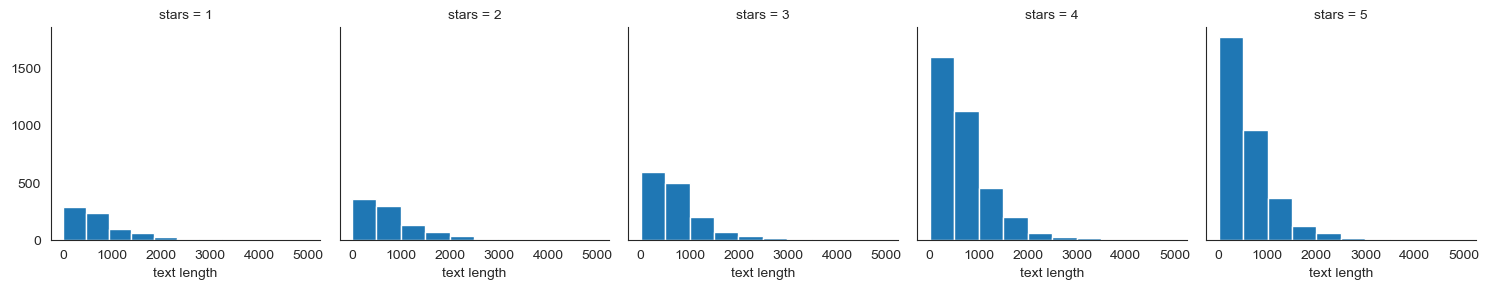

In [20]:
#Exploratory Data Analaysis
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

<Axes: xlabel='stars', ylabel='text length'>

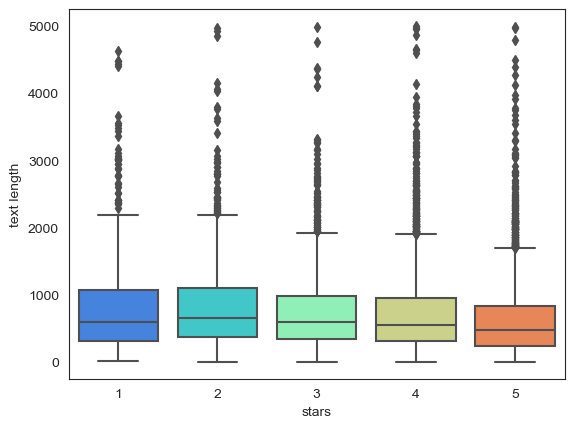

In [21]:
#Create a boxplot of the text length for each star category
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

C:\Users\DrAhm\AppData\Local\Temp\ipykernel_4976\2609484247.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yelp['useful'])


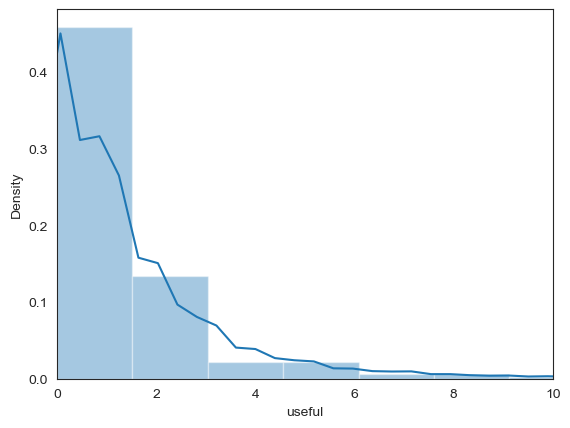

In [22]:
sns.distplot(yelp['useful'])
plt.xlim(0, 10)  # Set x-axis limits to show only results between 0 and 10
plt.show()

<Axes: xlabel='cool', ylabel='count'>

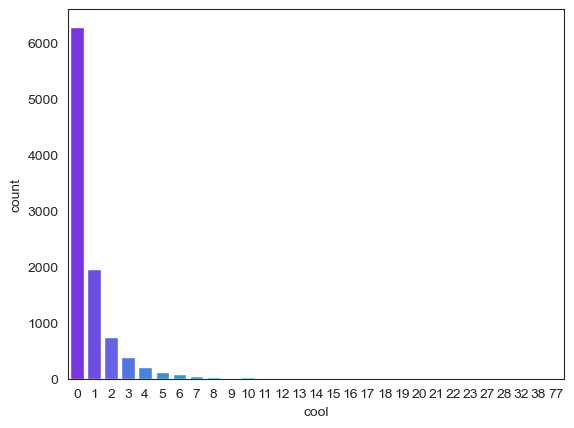

In [23]:
sns.countplot(x='cool',data=yelp,palette='rainbow')

<Axes: xlabel='useful', ylabel='count'>

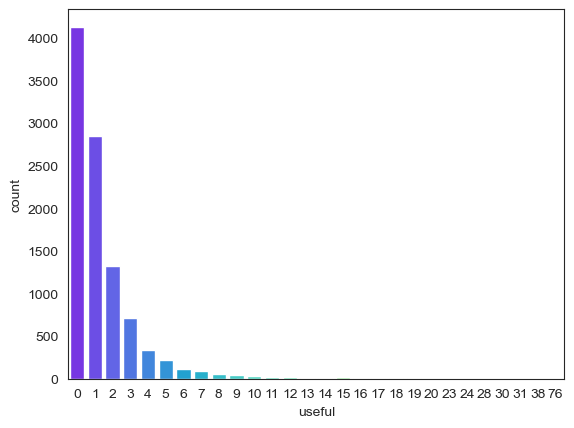

In [24]:
sns.countplot(x='useful',data=yelp,palette='rainbow')

<Axes: xlabel='stars', ylabel='count'>

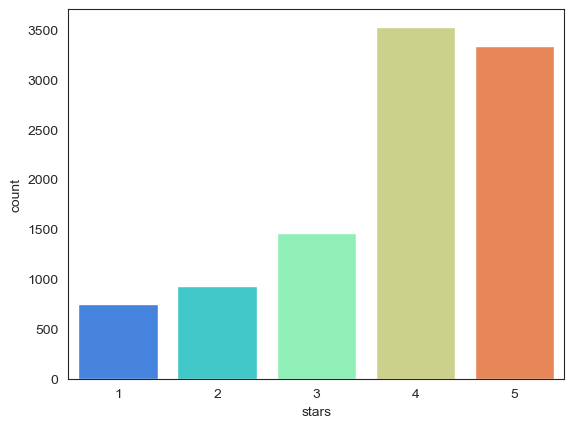

In [25]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [26]:
#using groupby Stars ,so we can get the average values of each column
stars = yelp.groupby('stars').mean(numeric_only=True)

stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


<Axes: >

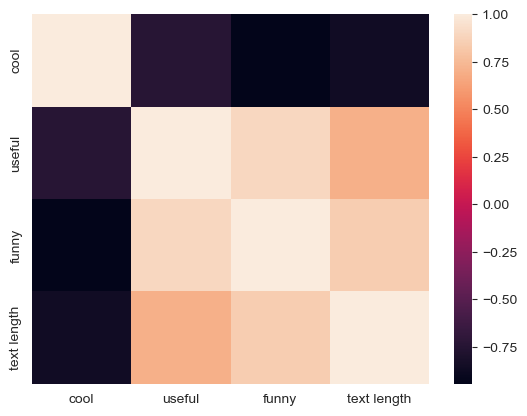

In [22]:
sns.heatmap(stars.corr())

In [23]:
#Nlp Classification 
#Create a DataFrame called "yelp_class" that includes all the columns from the yelp DataFrame, but only for 1 and 5 stars.
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [24]:
X = yelp_class['text']
y = yelp_class['stars']

In [25]:
#conerting into tokens 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [26]:
X = cv.fit_transform(X)

In [27]:
#Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [28]:
# Creating an instance of the Estimator 
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [29]:
nb.fit(X_train,y_train)

MultinomialNB()

In [30]:
predictions = nb.predict(X_test)

In [31]:
#importing and using confusion matrix and classification report to measure the accuracy of the model 
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[156  77]
 [ 37 956]]


              precision    recall  f1-score   support

           1       0.81      0.67      0.73       233
           5       0.93      0.96      0.94       993

    accuracy                           0.91      1226
   macro avg       0.87      0.82      0.84      1226
weighted avg       0.90      0.91      0.90      1226



In [32]:
#using TfidTransformer as it shows the importance of the words in text .
from sklearn.feature_extraction.text import  TfidfTransformer

In [36]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [41]:
# The pipeline contains all the pre-processing steps. We need to split the original data again: we already overwrote X with CountVecotized. We only want the text first.
#Running the train test split again for the yelp_class object.
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)



In [42]:
#fitting the pipeline to the train data ,we cannot use the previous train data because they were vectorized .
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [43]:
predictions = pipeline.predict(X_test)

In [44]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions, labels=np.unique(predictions)))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           5       0.81      1.00      0.90       998

   micro avg       0.81      1.00      0.90       998
   macro avg       0.81      1.00      0.90       998
weighted avg       0.81      1.00      0.90       998



In [ ]:
#the model provides acceptable results with an accuracy 0.90 and 0.90 f1 score